<a href="https://colab.research.google.com/github/pablillo77/data_science_1/blob/main/ProyectoDS_ParteI_Gimenez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

---

**Título: Exploración preliminar del dataset de Kaggle sobre Diabetes, basado en "Determinants of Gestational Diabetes Pedigree Function for Pima Indian Females" para comprender la distribución y relaciones en un conjunto de datos multidimensional**

**Resumen:**
Este estudio presenta una exploración preliminar de un dataset multidimensional basado en información del National Institute of Diabetes and Digestive and Kidney Diseases.El objetivo es comprender su estructura, distribución y posibles relaciones entre variables. Se utilizó un enfoque de análisis descriptivo y visualización de datos para examinar un conjunto de datos compuesto por información de parámetros que pueden incidir o no en el desarrollo de Diabetes, una funcion de scoring y un Outcome (Diabetes/No diabetes). Inicialmente, se realizó una exploración de la estructura del dataset, revelando un total de 768 observaciones y 9 variables. Luego, se calcularon estadísticas descriptivas para cada variable, proporcionando información sobre la media, mediana, desviación estándar y valores extremos.

Además, se llevaron a cabo visualizaciones univariadas y multivariadas para explorar la distribución de variables individuales y las relaciones entre pares de variables. Se identificaron [número de valores atípicos] valores atípicos en el dataset, los cuales serán objeto de un análisis más detallado en investigaciones posteriores. Se observaron también relaciones significativas entre ciertas variables, como se evidenció en la matriz de correlación y en las visualizaciones de datos multivariados.

En conjunto, estos resultados preliminares proporcionan una comprensión inicial de la estructura y la naturaleza de los datos, lo que servirá como base para análisis más avanzados y la construcción de modelos predictivos en investigaciones futuras.

---

Este abstract ofrece una visión general de los pasos y resultados clave obtenidos durante la exploración preliminar del dataset, lo que permite a los lectores comprender rápidamente la naturaleza y el alcance del estudio.

Fuente: https://github.com/pablillo77/data_science_1/blob/main/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf

# Importamos las librerias que utilizaremos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
mpl.style.use('ggplot')

In [3]:
url = 'https://raw.githubusercontent.com/pablillo77/data_science_1/main/diabetes.csv?token=GHSAT0AAAAAACQE62MIG6B5QH4AC6SJPM6CZQDEJOQ'
df = pd.read_csv(url)


# A continuación se agregan las definiciones de los campos:
Pregnancies: Expresa la cantidad de embarazos

Glucose: Nivel de glucosa en sangre en ayunas en mg/dl

BloodPressure: Presión diastólica en mmHg

SkinThickness: Espesor de la piel en el ticeps en mm

Insulin: Nivel de insulina en sangre en uU/ml

BMI: Indice de masa corporal, es la altura dividida el peso elevado al cuadrado. La altura expresada en metros y el peso en kg.

DiabetesPedigreeFunction: Parametro que expresa la probabilidad de un individuo de desarrollar diabetes, basado en su edad e historia familiar. Varía entre 0,08 y 2,42
Age: Edad

Outcome: Para expresar el resultado final 1: diabetes 0: sin diabetes

## Preguntas e hiótesis inciales
* 1) Estudiar la relación entre las variables, por ejemplo entre Insulina y
Glucosa. La insulina es la hormona que permite que la glucosa en sangre entre a las células, cuando la persona presenta glucemia elevada de manera anormal, valores anormalmente altos de insulina en ayunas (>25 uU/ml) pueden indicar resistencia a la insulina y aumenta las chances de desarrollar diabetes de tipo 2. Si la glucemia es elevada pero la insulina no, puede ser una indicación de qu el páncreas ya no alcanza a compensarlo y se puede desarrollar diabetes de tipo 1.

* 2) Investigar y ampliar correlaciones con las otras variables del dataset. El indice de masa corporal BMI, suele ser un predictor de sindrome metabólico y puede aumentar las chances de desarrollar diabetes.

* 3) Investigar a futuro si se encuentran correlaciones fuertes entre las variables, si existe redundancia y si es factible aplicar algún método para reducir la dimensionalidad del dataset como PCA y quedarnos con combinaciones que expresen la maxima variabilidad de los datos.

#Estructura y resumen estadístico

In [4]:
print("Las columnas del dataset son: ")
df.columns

Las columnas del dataset son: 


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Las dimensiones del dataset son: ")
df.shape


Las dimensiones del dataset son: 


(768, 9)

## Análisis de datos faltantes. Se evidencian valores en 0 que son físicamente incorrectos en las variables, Glucose, BloodPressure, SkinThickness, Insulin y BMI. Se procede a reemplazarlos por NaN para su posterior análisis.

In [7]:
df_nan = df.copy(deep=True) #creo una copia para mantener el original
df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]] = df_nan[["Glucose",	"BloodPressure", "SkinThickness", "Insulin",	"BMI"]].replace(to_replace=0, value=np.nan)



In [8]:
print(df_nan.isna().sum()) #valores con su conteo de NaNs

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
# Calcular el coeficiente de variación para la glucosa y la insulina
coef_var = (df_nan["Glucose"].std() / df_nan['Glucose'].mean() *100).round(2)
print("El coeficiente de variación para la glucosa es:\n",coef_var)
coef_var = (df_nan["Insulin"].std() / df_nan['Insulin'].mean() *100).round(2)
print("El coeficiente de variación para la insulina es:\n",coef_var)
coef_var = (df_nan["SkinThickness"].std() / df_nan['SkinThickness'].mean() *100).round(2)
print("El coeficiente de variación para la SkinThickness es:\n",coef_var)
coef_var = (df_nan["BMI"].std() / df_nan['BMI'].mean() *100).round(2)
print("El coeficiente de variación para la BMI es:\n",coef_var)
coef_var = (df_nan["BloodPressure"].std() / df_nan['BloodPressure'].mean() *100).round(2)
print("El coeficiente de variación para la BloodPressure es:\n",coef_var)

El coeficiente de variación para la glucosa es:
 25.09
El coeficiente de variación para la insulina es:
 76.36
El coeficiente de variación para la SkinThickness es:
 35.94
El coeficiente de variación para la BMI es:
 21.34
El coeficiente de variación para la BloodPressure es:
 17.1


## Entendemos que de los valores con datos faltantes, Glucose, BMI y BloodPressure presentan una distribución simétrica. Se utilizará entonces como estrategia, reemplazarlos por su media, ya que están muy por debajo del 15% de los datos totales. En cuanto a los valores de Insulin y SkinThickness, son variables de interés por lo cual en esta instancia es preferible descartar sus NaN para no distorsionar el análisis.

In [10]:
df_nan["Glucose"].fillna(df_nan["Glucose"].mean(), inplace=True)
df_nan["BloodPressure"].fillna(df_nan["BloodPressure"].mean(), inplace=True)
df_nan["BMI"].fillna(df_nan["BMI"].mean(), inplace=True)
print(df_nan.isna().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
df_nan=df_nan.dropna()
print(df_nan.isna().sum())
df_nan.shape #verifico que quedamos ahora con 394 filas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(394, 9)

In [12]:
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [70]:
#realizare un analis KNN-Means para estudiar clusterización posible de los datos, voy a quedarme con 3 variables, Glucose, Insulin, DiabetesPedigreeFunction
############################################################################################################################################################
df_KNN = df_nan.copy(deep=True)
df_KNN.reset_index(inplace=True)
df_KNN.drop(columns=["Pregnancies", "BloodPressure", "SkinThickness", "BMI","Age", "Outcome","index"], inplace=True)

df_KNN


,Glucose,Insulin,DiabetesPedigreeFunction
0,89.0,94.0,0.167
1,137.0,168.0,2.288
2,78.0,88.0,0.248
3,197.0,543.0,0.158
4,189.0,846.0,0.398
...,...,...,...
389,181.0,510.0,0.222
390,128.0,110.0,1.057
391,88.0,16.0,0.766
392,101.0,180.0,0.171


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

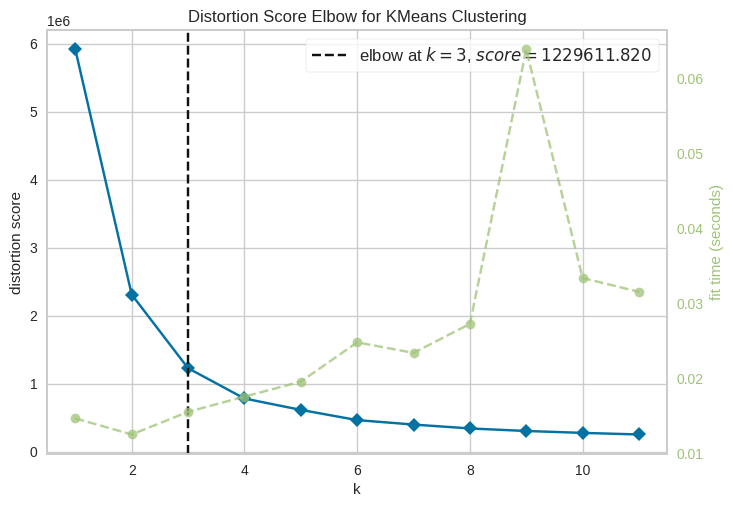

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_KNN)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

In [72]:
#Voy a estandarizar los datos con el standard scaler
# los datos deben ser estandarizados ya que al tener las variables de entrada de diferente naturaleza, puede generar ruido en la segmentación.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #genero una instancia del Scaler
df_KNN_scaled = scaler.fit_transform(df_KNN) #realizo el fit
df_KNN_scaled

array([[-1.09333323, -0.51884686, -1.02533958],
       [ 0.46794788,  0.10496753,  5.04016543],
       [-1.45112681, -0.5694264 , -0.79370078],
       ...,
       [-1.12585992, -1.17638095,  0.68764368],
       [-0.70301295,  0.20612662, -1.01390063],
       [-0.05247915, -0.36710822, -0.80227999]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

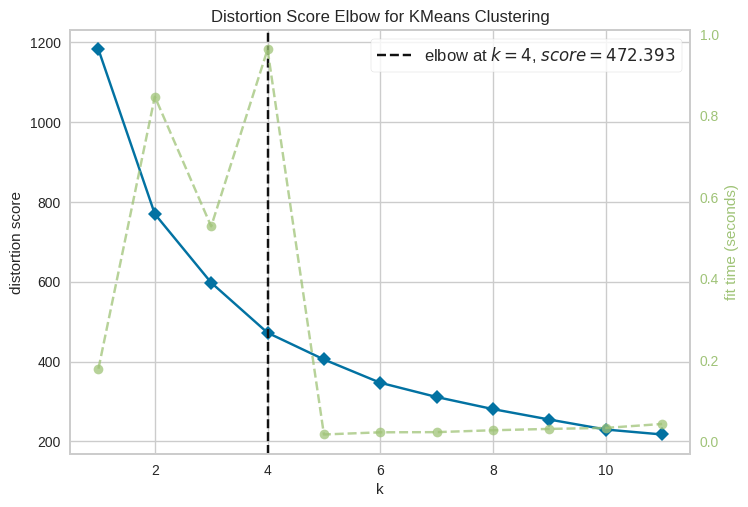

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_KNN_scaled)        # Entrenamos con los datos escalados para comparar
visualizer.show()

In [74]:
# Crear y ajustar el modelo K-means
modelo = KMeans(n_clusters=4, max_iter=1000, init='random', random_state=27)
preds = modelo.fit_predict(df_KNN_scaled)
preds #preds es un array de una dimension

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 3, 3, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1,
       1, 0, 3, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1,
       0, 1, 2, 0, 1, 1, 0, 3, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2,
       1, 3, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 3, 0, 1,
       1, 3, 1, 3, 1, 1, 0, 1, 2, 0, 3, 3, 1, 2, 3, 2, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 0, 3, 2, 1, 1, 1, 2, 2, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 2,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1,
       1, 2, 1, 0, 3, 0, 1, 1, 0, 3, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 1, 3, 1, 2, 2, 0, 0, 3, 1, 2, 0, 0, 3, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3,

In [75]:
print(df_KNN.isna().sum())
len(df_KNN_scaled)
print(preds.shape)
print(df_KNN.shape)
df_KNN


Glucose                     0
Insulin                     0
DiabetesPedigreeFunction    0
dtype: int64
(394,)
(394, 3)


,Glucose,Insulin,DiabetesPedigreeFunction
0,89.0,94.0,0.167
1,137.0,168.0,2.288
2,78.0,88.0,0.248
3,197.0,543.0,0.158
4,189.0,846.0,0.398
...,...,...,...
389,181.0,510.0,0.222
390,128.0,110.0,1.057
391,88.0,16.0,0.766
392,101.0,180.0,0.171


In [76]:
#convierto preds en un dataframe y lo concateno con df_KNN
preds=pd.DataFrame(preds) #convierto a dataframe
df_concat=pd.concat([df_KNN, preds], axis=1)
#df_concat=df_concat.dropna()
#df_concat
#print(df_concat.isna().sum())
df_concat=df_concat.rename(columns = {0:'cluster'})
df_concat

,Glucose,Insulin,DiabetesPedigreeFunction,cluster
0,89.0,94.0,0.167,1
1,137.0,168.0,2.288,2
2,78.0,88.0,0.248,1
3,197.0,543.0,0.158,3
4,189.0,846.0,0.398,3
...,...,...,...,...
389,181.0,510.0,0.222,3
390,128.0,110.0,1.057,2
391,88.0,16.0,0.766,1
392,101.0,180.0,0.171,1


In [77]:
df_concat.groupby(["cluster"])[["Glucose", "Insulin", "DiabetesPedigreeFunction"]].describe()

Glucose                                                             \
          count        mean        std    min    25%    50%     75%    max   
cluster                                                                      
0         114.0  151.008772  20.768209  114.0  135.0  146.0  165.75  198.0   
1         186.0  100.240251  14.933470   56.0   89.0  100.0  111.75  134.0   
2          64.0  118.140625  23.060904   77.0  103.0  119.5  128.00  180.0   
3          30.0  162.966667  21.777057  124.0  147.0  161.5  181.00  197.0   

        Insulin              ...                DiabetesPedigreeFunction  \
          count        mean  ...     75%    max                    count   
cluster                      ...                                           
0         114.0  181.017544  ...  225.00  335.0                    114.0   
1         186.0   92.935484  ...  115.75  325.0                    186.0   
2          64.0  143.328125  ...  182.00  310.0                     64.0   
3          30.0  473.033333  ...  532.50  846.0                     30.0   

                                                                     
             mean       std    min      25%     50%      75%    max  
cluster                                                              
0        0.442272  0.206552  0.115  0.26850  0.4165  0.59025  1.034  
1        0.377204  0.169213  0.085  0.24525  0.3525  0.49675  0.767  
2        1.052078  0.341120  0.692  0.81975  0.9555  1.17775  2.420  
3        0.638400  0.515943  0.128  0.28525  0.5630  0.71400  2.329  

[4 rows x 24 columns]

In [88]:
cluster_0 = df_concat[df_concat.cluster.isin([0])]
cluster_1 = df_concat[df_concat.cluster.isin([1])]
cluster_2 = df_concat[df_concat.cluster.isin([2])]
cluster_3 = df_concat[df_concat.cluster.isin([3])]


,Glucose,Insulin,DiabetesPedigreeFunction,cluster
5,166.0,175.0,0.587,0
6,118.0,230.0,0.551,0
9,126.0,235.0,0.704,0
10,143.0,146.0,0.254,0
13,145.0,110.0,0.245,0
...,...,...,...,...
368,134.0,291.0,0.352,0
370,173.0,185.0,0.970,0
373,149.0,127.0,0.349,0
377,174.0,120.0,0.646,0


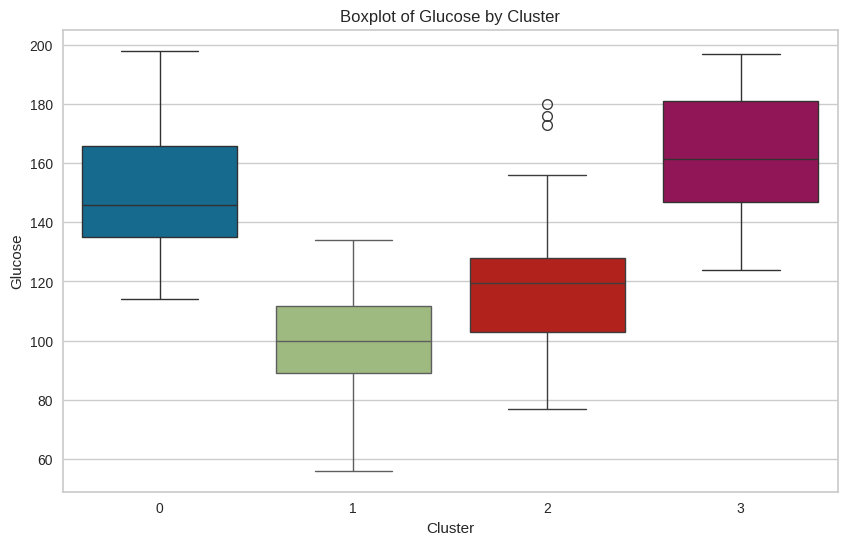

In [90]:
# prompt: create a boxplot with seaborn showing in the same plot the dataframes cluster_0, cluster_1,cluster_2, cluster_3. Consider they have diferent sizes, the study variable in common is "Glucose" within each dataframe.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for each cluster
sns.boxplot(x="cluster", y="Glucose", data=cluster_0, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_1, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_2, ax=ax)
sns.boxplot(x="cluster", y="Glucose", data=cluster_3, ax=ax)

# Set the title and labels
ax.set_title("Boxplot of Glucose by Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Glucose")

# Show the plot
plt.show()


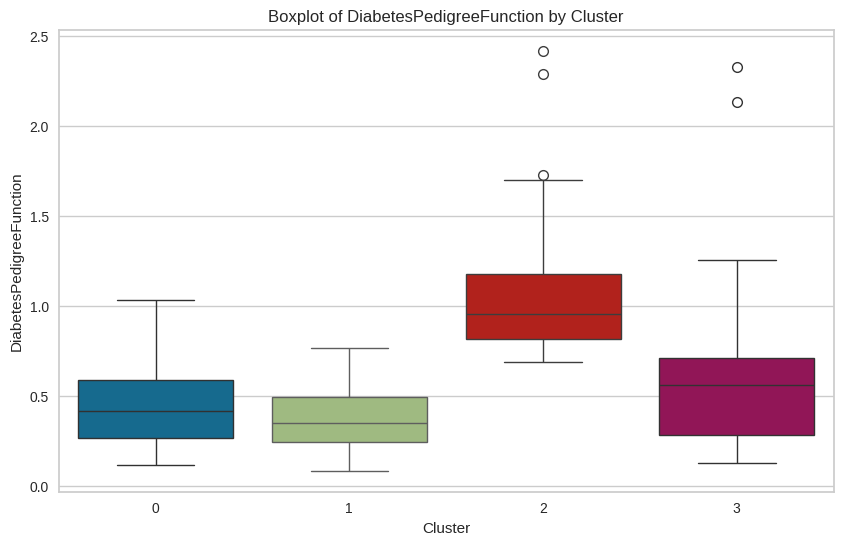

In [91]:
# prompt: create a boxplot with seaborn showing in the same plot the dataframes cluster_0, cluster_1,cluster_2, cluster_3. Consider they have diferent sizes, the study variable in common is "DiabetesPedigreeFunction" within each dataframe.

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for each cluster
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_0, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_1, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_2, ax=ax)
sns.boxplot(x="cluster", y="DiabetesPedigreeFunction", data=cluster_3, ax=ax)

# Set the title and labels
ax.set_title("Boxplot of DiabetesPedigreeFunction by Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("DiabetesPedigreeFunction")

# Show the plot
plt.show()


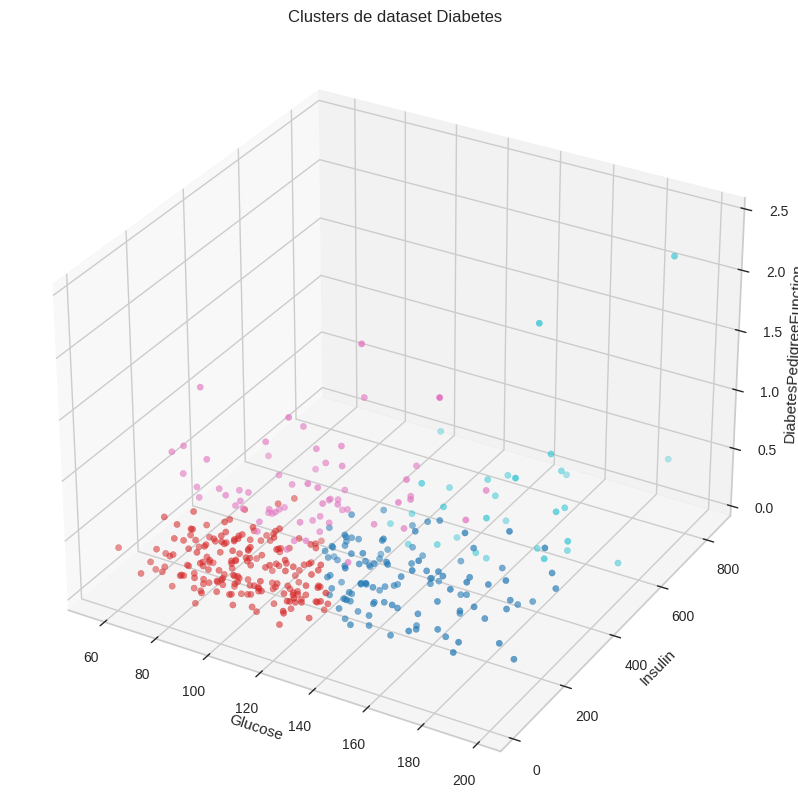

In [93]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df_KNN["Glucose"], df_KNN["Insulin"], df_KNN["DiabetesPedigreeFunction"], c=preds, cmap="tab10")
plt.title("Clusters de dataset Diabetes")
ax.set_xlabel("Glucose")
ax.set_ylabel("Insulin")
ax.set_zlabel("DiabetesPedigreeFunction")
plt.show()

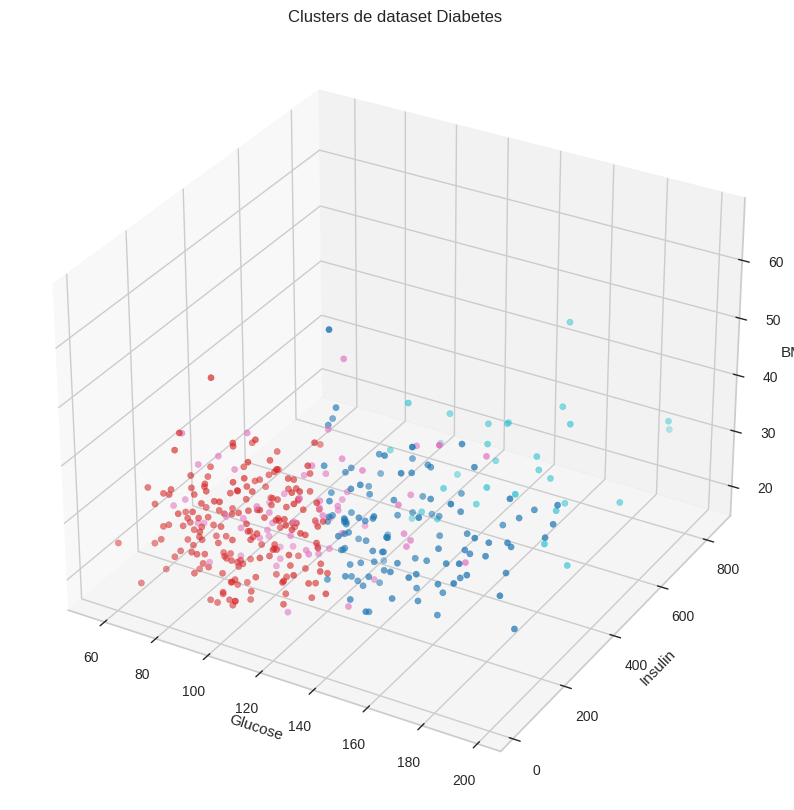

In [94]:
# prompt: from dataframe df_nan, deep copy and produce another dataset called df_KNN_BMI keeping columns Glucose, Insulin and BMI. Produce a 3d plot like the previous snippet

import matplotlib.pyplot as plt
df_KNN_BMI = df_nan.copy(deep=True)
df_KNN_BMI.reset_index(inplace=True)
df_KNN_BMI.drop(columns=["Pregnancies", "BloodPressure", "SkinThickness", "DiabetesPedigreeFunction","Age", "Outcome","index"], inplace=True)
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
ax.scatter3D(df_KNN_BMI["Glucose"], df_KNN_BMI["Insulin"], df_KNN_BMI["BMI"], c=preds, cmap="tab10")
plt.title("Clusters de dataset Diabetes")
ax.set_xlabel("Glucose")
ax.set_ylabel("Insulin")
ax.set_zlabel("BMI")
plt.show()


In [ ]:
df_diabeticos = df_nan[df_nan["Outcome"] == 1] #creo un subdataset de los pacientes que tienen como Outcome 1, diabéticos.
df_diabeticos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174.0,88.0,37.0,120.0,44.5,0.646,24,1
740,11,120.0,80.0,37.0,150.0,42.3,0.785,48,1
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


##Graficos con matplotlib univariados

<Axes: title={'center': 'BloodPressure'}, ylabel='Frecuencia'>

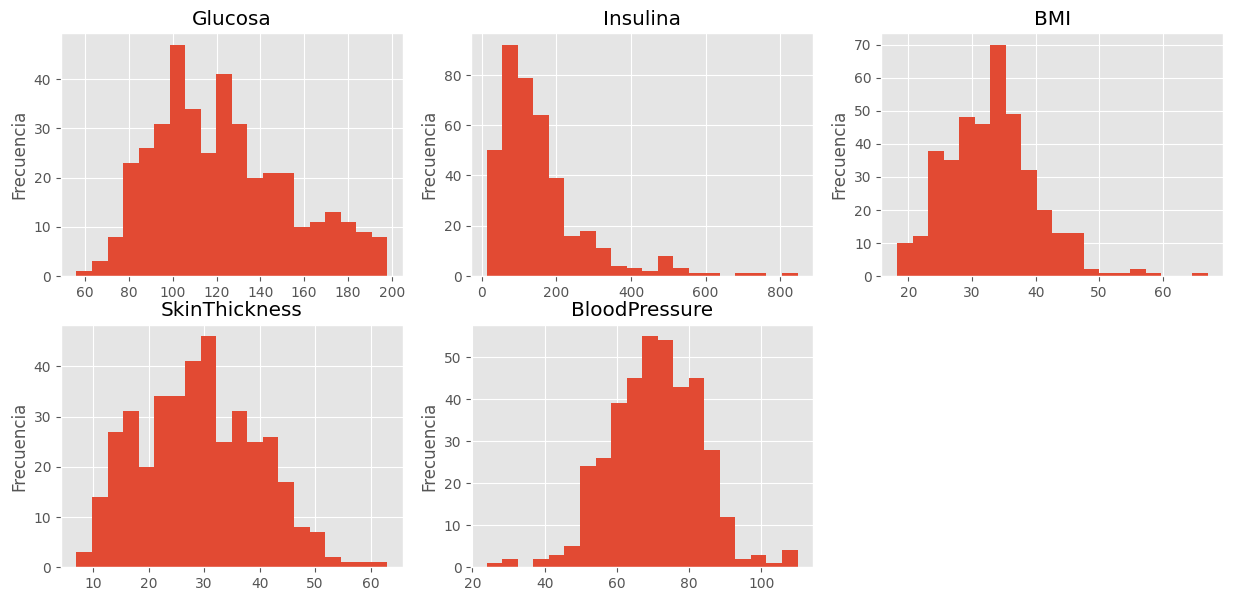

In [ ]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1)
plt.subplot(2,3,1)
df_nan['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(2,3,2)
df_nan['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')
plt.subplot(2,3,3)
df_nan['BMI'].plot(kind='hist', bins=20, title='BMI', ylabel='Frecuencia')
plt.subplot(2,3,4)
df_nan['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness', ylabel='Frecuencia')
plt.subplot(2,3,5)
df_nan['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure', ylabel='Frecuencia')

Glucose, BMI y BloodPressure presentan una distribución relativamente simétrica, consistente con los resulatados de los coeficientes de variación. Se aprecian valores de insulina muy elevados, que no se condicen en principio con valores fisiológicos (se intentará buscar más información)

## Graficos con matplotlib univariados del sub-dataset df_diabéticos.

<Axes: title={'center': 'BloodPressure'}, ylabel='Frecuencia'>

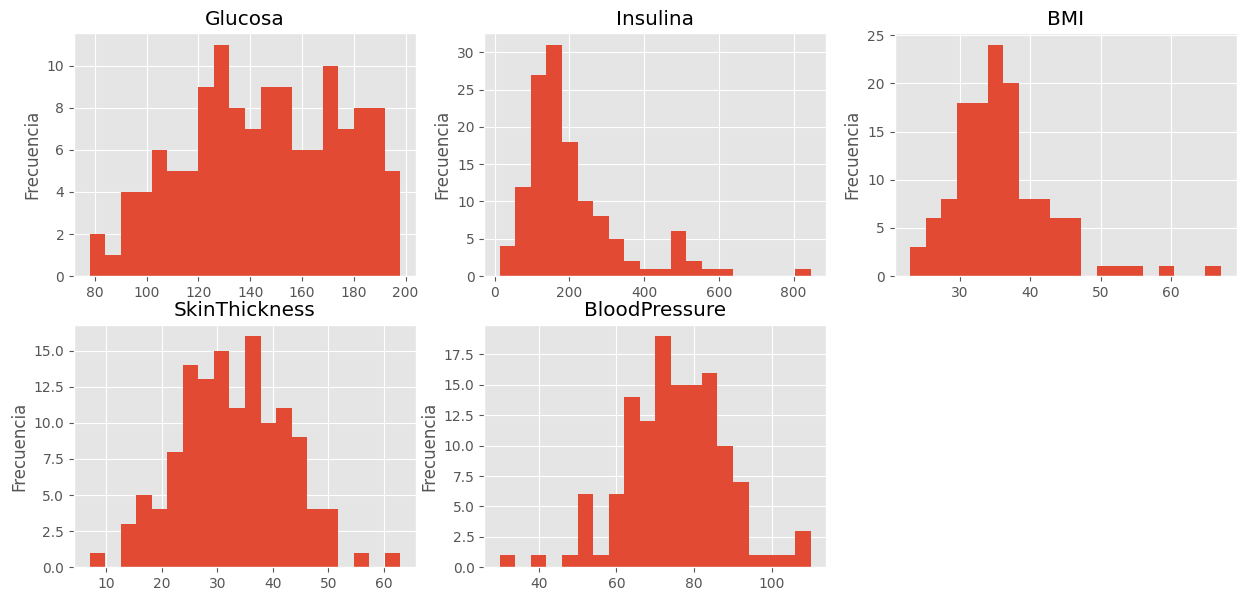

In [ ]:
plt.figure(figsize=(15,6)) #realizo los mismos plots pero solo para los diabeticos, con el fin de ver tendencias y corrimientos.
plt.subplots_adjust(top=1)
plt.subplot(2,3,1)
df_diabeticos['Glucose'].plot(kind='hist', bins=20, title='Glucosa', ylabel='Frecuencia')
plt.subplot(2,3,2)
df_diabeticos['Insulin'].plot(kind='hist', bins=20, title='Insulina', ylabel='Frecuencia')
plt.subplot(2,3,3)
df_diabeticos['BMI'].plot(kind='hist', bins=20, title='BMI', ylabel='Frecuencia')
plt.subplot(2,3,4)
df_diabeticos['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness', ylabel='Frecuencia')
plt.subplot(2,3,5)
df_diabeticos['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure', ylabel='Frecuencia')

Se aprecia un corrimiento de las distribuciones hacia valores más altos, en glucosa,insulina y skinthickness principalmente.

## Análisis de correlación dataset total

<Axes: >

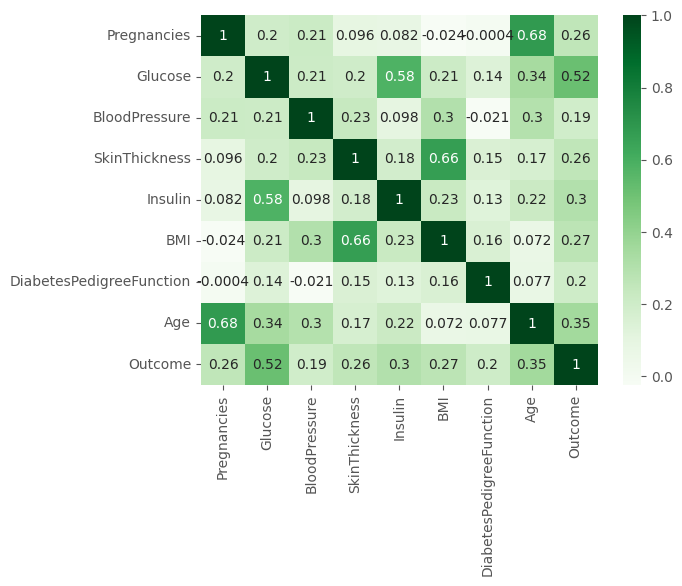

In [ ]:
matrix = df_nan.corr() #total

sns.heatmap(matrix, cmap="Greens", annot=True)

Se observan en general correlaciones débiles entre las variables. Hay correlación positiva moderada entre Glucose y Outcome, Glucose e Insulin, BMI y SkinThickness. Correlación positiva más fuerte entre cantidad de Pregnancies y Age. No se observa una relación marcada entre la funcion DiabetesPedigree y el Outcome.

## Visualización de datos multivariados

Text(0, 0.5, 'Insulina (uU/ml)')

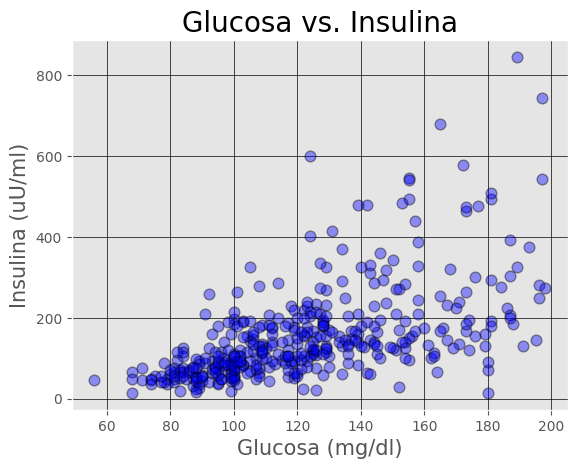

In [ ]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["Glucose"], df_nan["Insulin"], alpha=0.4, facecolor="blue", linewidths=1, s=60, edgecolor="k")
ax.set_title('Glucosa vs. Insulina', fontsize=20)
ax.set_xlabel('Glucosa (mg/dl)', fontsize=15)
ax.set_ylabel('Insulina (uU/ml)', fontsize=15)


Text(0, 0.5, 'BMI')

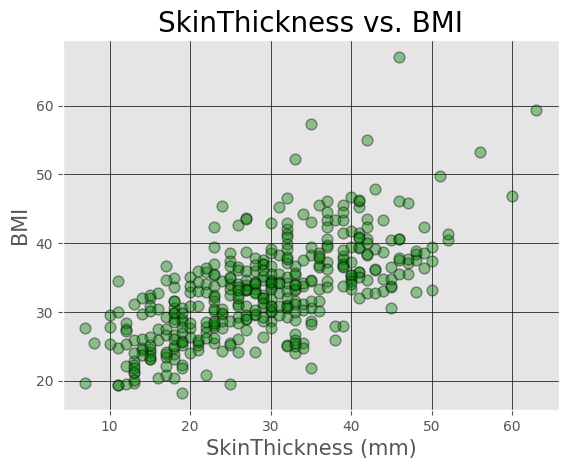

In [ ]:
fig, ax = plt.subplots()
ax.grid(color="k",linestyle="-", linewidth=0.5)
ax.scatter(df_nan["SkinThickness"], df_nan["BMI"], alpha=0.4, facecolor="green", linewidths=1, s=60, edgecolor="k")
ax.set_title('SkinThickness vs. BMI', fontsize=20)
ax.set_xlabel('SkinThickness (mm)', fontsize=15)
ax.set_ylabel('BMI', fontsize=15)

## De acuerdo al "Outcome" realizaré un recuento para un gráfico de barras utilizandolo como variable categórica:

Outcome
0    264
1    130
Name: count, dtype: int64

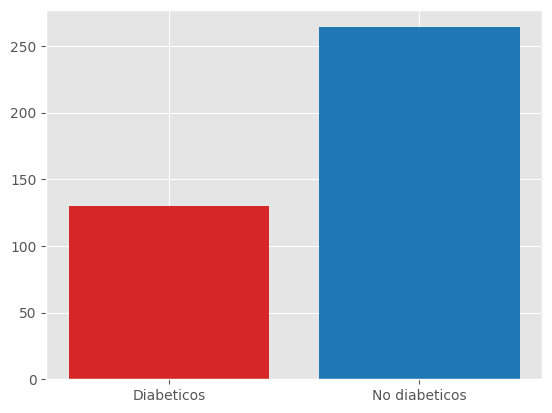

In [ ]:
df_nan["Pregnancies"]=df_nan["Pregnancies"].astype('category') #redefino los tipos de Pregnancies y Outcome como categóricas.
df_nan.Outcome=df_nan.Outcome.astype('category')

fig, ax = plt.subplots()
counts = [df_nan['Outcome'].value_counts()[1], df_nan["Outcome"].value_counts()[0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']
ax.bar(["Diabeticos","No diabeticos"], counts, label=bar_labels, color=bar_colors)
df_nan['Outcome'].value_counts()


In [ ]:
df_nan.describe(include='category')

,Pregnancies,Outcome
count,394,394
unique,17,2
top,1,0
freq,94,264


## Realizo los mismos histogramas de Glucosa e Insulina pero utilizando seaborn

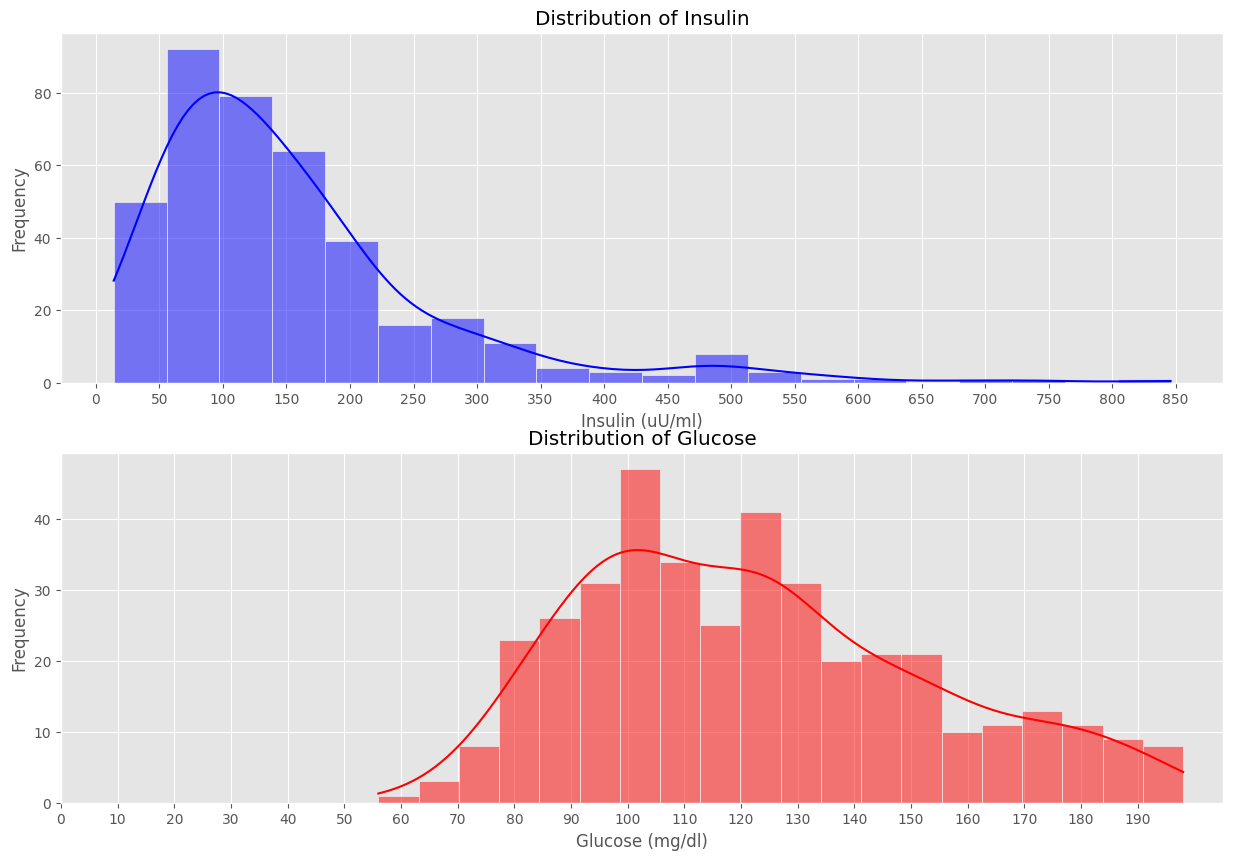

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.histplot(data=df_nan, x="Insulin", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("Distribution of Insulin")
ax[0].set_xlabel("Insulin (uU/ml)")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 900, 50))
sns.histplot(data=df_nan, x="Glucose", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("Distribution of Glucose")
ax[1].set_xlabel("Glucose (mg/dl)")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 200, 10))
#'DiabetesPedigreeFunction'
plt.show()


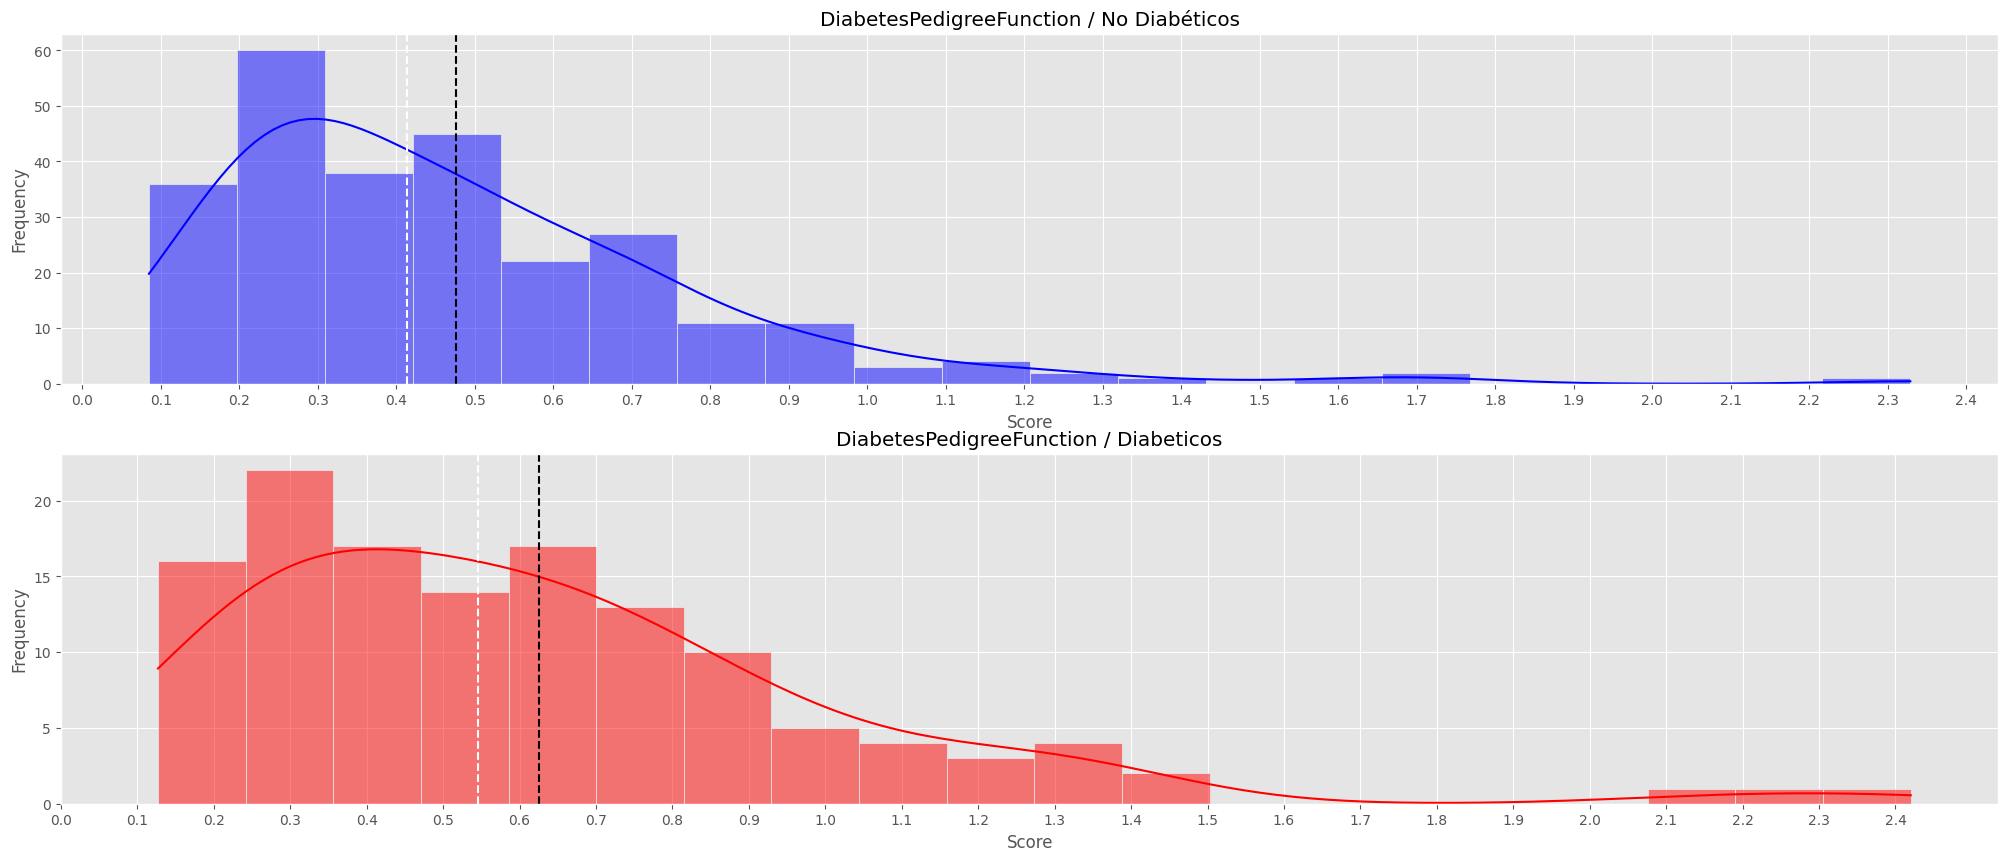

In [ ]:
df_no_diabeticos= df_nan[df_nan["Outcome"] == 0] #separo los pacientes no diabeticos
fig, ax = plt.subplots(2, 1, figsize=(25, 10))
sns.histplot(data=df_no_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="blue", ax=ax[0])
ax[0].set_title("DiabetesPedigreeFunction / No Diabéticos")
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Frequency")
ax[0].set_xticks(np.arange(0, 2.5, 0.1))
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[0].axvline(df_no_diabeticos["DiabetesPedigreeFunction"].median(), color="white", linestyle="--", label="Mediana")
sns.histplot(data=df_diabeticos, x="DiabetesPedigreeFunction", bins=20, kde=True, color="red", ax=ax[1])
ax[1].set_title("DiabetesPedigreeFunction / Diabeticos")
ax[1].set_xlabel("Score")
ax[1].set_ylabel("Frequency")
ax[1].set_xticks(np.arange(0, 2.5, 0.1))
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].mean(), color="black", linestyle="--", label="Media")
ax[1].axvline(df_diabeticos["DiabetesPedigreeFunction"].median(), color="white", linestyle="--", label="Mediana")
plt.show()

## Diagrama de caja y bigotes para detectar outliers

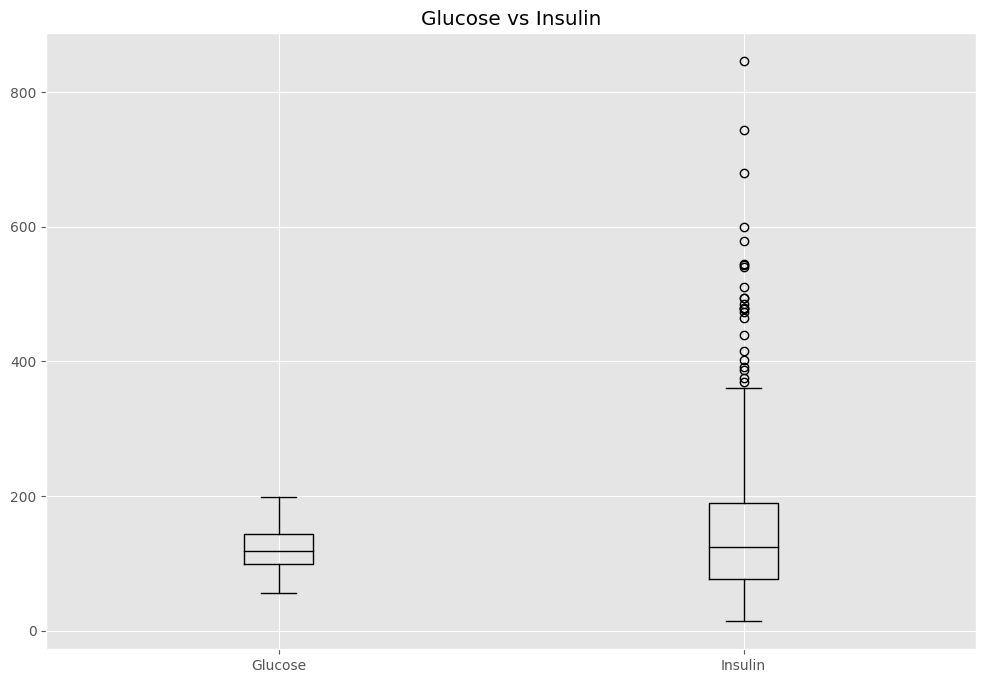

In [ ]:
df_nan[['Glucose', 'Insulin']].plot(kind='box', color="k", title='Glucose vs Insulin', figsize=(12, 8))
plt.gca().spines[['top', 'right',]].set_visible(True)


## Insights preliminares de esta primera entrega



Estructura, el dataset tiene originalmente muchos valores en 0 que son físicamente incorrectos en las variables, Glucose, BloodPressure, SkinThickness, Insulin y BMI. Se procedió a reemplazarlos por NaN para su posterior tratamiento. Se calcularon coeficientes de variación, los valores con datos faltantes, Glucose, BMI y BloodPressure presentaron una distribución simétrica. Se utilizó entonces como estrategia, reemplazarlos por su media, ya que están muy por debajo del 15% de los datos totales. En cuanto a los valores de Insulin y SkinThickness, son variables de interés por lo cual en esta instancia es preferible descartar sus NaN para no distorsionar el análisis.

Se puede apreciar observando los gráficos univariados de no diabéticos (según su Outcome) y diabéticos, que las distribuciones se corren hacia valores más altos en estos últimos, principalmente en glucosa, insulina y grosor de la piel.

Se observan en general correlaciones débiles entre las variables. Hay correlación positiva moderada entre Glucose y Outcome, Glucose e Insulin, BMI y SkinThickness. Correlación positiva más fuerte entre cantidad de Pregnancies y Age. No se observa una relación marcada entre la funcion DiabetesPedigree y el Outcome.

Se grafican a modo de ejemplo de gráfico multivariado, glucosa vs insulina y SkinThickness vs BMI. Se utiliza Matplotlib y luego Seaborn. En cuanto al estudio de la función de pedigree de diabetes (DPF), para su tratamiento se separó la muestra en diabéticos y no diabéticos, siendo en el primer grupo su media mayor a la del segundo, lo cual sugiere su utilidad en el estudio de la enfermedad. También se realizó un diagrama de caja para ver outliers. Los outliers de insulina, si las unidades son como indica el paper del estudio en microU / ml, presenta valores demasiado elevados. Se intentará buscar más información sobre ellos.